<a href="https://colab.research.google.com/github/beelittlehoney/CCADMACL_PROJECT_COM222/blob/main/Advance_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing

## Import Necessary Libraries

In [33]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Load the Dataset

In [34]:
file_path = "India_Condom_Market_Dataset.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  'ankushpanday1/condom-market-size-in-india',
  file_path
)

df.head()

<ipython-input-34-ed1dfc46cf0f>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,Year,Market Size (USD Million),CAGR (%),Material Type,Product Type,Distribution Channel,Event Name,Event Date,Company Involved,Event Details,Region,Market Penetration,Growth Rate (%),Brand Name,Market Share (%),Revenue Contribution (%),Innovation Index,Regulatory Impact,Awareness Campaign Impact
0,2027,1119.93,10.20,Non-latex,Male Condoms,Drug Stores,Product Launch,2027-06-20,Sirona Hygiene Private Limited,Launched new product,West India,Medium,12.27,Durex,31.01,6.66,6.28,High,1.23
1,2024,1479.27,12.52,Latex,Male Condoms,Drug Stores,Campaign,2020-03-14,Godrej Consumer Products Limited,Acquired smaller brand,West India,Low,12.89,Playboy,35.78,14.97,2.70,Low,6.43
2,2023,894.44,9.31,Latex,Male Condoms,Drug Stores,Product Launch,2027-03-23,TTK,Ran awareness campaign,North India,Medium,10.55,Skore,29.22,4.99,5.66,Medium,3.64
3,2030,1181.72,12.77,Non-latex,Male Condoms,Mass Merchandisers,Product Launch,2028-07-01,Godrej Consumer Products Limited,Ran awareness campaign,West India,Low,9.68,Durex,28.97,2.86,4.38,Low,95.27
4,2023,1636.19,10.45,Non-latex,Female Condoms,Mass Merchandisers,Campaign,2030-04-11,HLL Lifecare Limited,Acquired smaller brand,South India,Medium,10.24,Skore,24.33,3.92,6.11,High,12.13


## Display Initial Info

In [35]:
display(df.head())
print(df.info())
print(df.describe(include='all'))

,Year,Market Size (USD Million),CAGR (%),Material Type,Product Type,Distribution Channel,Event Name,Event Date,Company Involved,Event Details,Region,Market Penetration,Growth Rate (%),Brand Name,Market Share (%),Revenue Contribution (%),Innovation Index,Regulatory Impact,Awareness Campaign Impact
0,2027,1119.93,10.20,Non-latex,Male Condoms,Drug Stores,Product Launch,2027-06-20,Sirona Hygiene Private Limited,Launched new product,West India,Medium,12.27,Durex,31.01,6.66,6.28,High,1.23
1,2024,1479.27,12.52,Latex,Male Condoms,Drug Stores,Campaign,2020-03-14,Godrej Consumer Products Limited,Acquired smaller brand,West India,Low,12.89,Playboy,35.78,14.97,2.70,Low,6.43
2,2023,894.44,9.31,Latex,Male Condoms,Drug Stores,Product Launch,2027-03-23,TTK,Ran awareness campaign,North India,Medium,10.55,Skore,29.22,4.99,5.66,Medium,3.64
3,2030,1181.72,12.77,Non-latex,Male Condoms,Mass Merchandisers,Product Launch,2028-07-01,Godrej Consumer Products Limited,Ran awareness campaign,West India,Low,9.68,Durex,28.97,2.86,4.38,Low,95.27
4,2023,1636.19,10.45,Non-latex,Female Condoms,Mass Merchandisers,Campaign,2030-04-11,HLL Lifecare Limited,Acquired smaller brand,South India,Medium,10.24,Skore,24.33,3.92,6.11,High,12.13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       50000 non-null  int64  
 1   Market Size (USD Million)  50000 non-null  float64
 2   CAGR (%)                   50000 non-null  float64
 3   Material Type              50000 non-null  object 
 4   Product Type               50000 non-null  object 
 5   Distribution Channel       50000 non-null  object 
 6   Event Name                 50000 non-null  object 
 7   Event Date                 50000 non-null  object 
 8   Company Involved           50000 non-null  object 
 9   Event Details              50000 non-null  object 
 10  Region                     50000 non-null  object 
 11  Market Penetration         50000 non-null  object 
 12  Growth Rate (%)            50000 non-null  float64
 13  Brand Name                 50000 non-null  obj

## Check for Missing Values

In [36]:
print("Missing Values Per Column:\n", df.isnull().sum())

Missing Values Per Column:
 Year                         0
Market Size (USD Million)    0
CAGR (%)                     0
Material Type                0
Product Type                 0
Distribution Channel         0
Event Name                   0
Event Date                   0
Company Involved             0
Event Details                0
Region                       0
Market Penetration           0
Growth Rate (%)              0
Brand Name                   0
Market Share (%)             0
Revenue Contribution (%)     0
Innovation Index             0
Regulatory Impact            0
Awareness Campaign Impact    0
dtype: int64


In [37]:
# Convert date column to datetime format if applicable
if 'Event Date' in df.columns:
  df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')
  df['Year'] = df['Event Date'].dt.year
  df['Month'] = df['Event Date'].dt.month
  df['Day'] = df['Event Date'].dt.day

## Identify Categorical and Numerical Features

In [38]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Market Size (USD Million)', 'CAGR (%)', 'Growth Rate (%)', 'Market Share (%)', 'Revenue Contribution (%)', 'Innovation Index', 'Awareness Campaign Impact']
Categorical Features: ['Material Type', 'Product Type', 'Distribution Channel', 'Event Name', 'Company Involved', 'Event Details', 'Region', 'Market Penetration', 'Brand Name', 'Regulatory Impact']


In [39]:
# Remove 'Event Date' from categorical features if present
if 'Event Date' in categorical_features:
  categorical_features.remove('Event Date')

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Market Size (USD Million)', 'CAGR (%)', 'Growth Rate (%)', 'Market Share (%)', 'Revenue Contribution (%)', 'Innovation Index', 'Awareness Campaign Impact']
Categorical Features: ['Material Type', 'Product Type', 'Distribution Channel', 'Event Name', 'Company Involved', 'Event Details', 'Region', 'Market Penetration', 'Brand Name', 'Regulatory Impact']


## Handle Missing Values

In [40]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

## Scale Numerical Features

In [41]:
scaler = StandardScaler()

## Encode Categorical Features If They Exist

In [42]:
if categorical_features:
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  cat_pipeline = Pipeline(steps=[('imputer', cat_imputer), ('encoder', encoder)])
else:
  cat_pipeline = 'drop'  # If no categorical features, drop this step

## Pre-Processing Pipeline

In [43]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', scaler)]), numerical_features),
    ('cat', cat_pipeline, categorical_features)
  ]
)

## Apply Transformation

In [44]:
X_processed = preprocessor.fit_transform(df)

# Debugging: Print shape to verify transformation
print("Transformed Data Shape:", X_processed.shape)

Transformed Data Shape: (50000, 46)


## Convert back to DataFrame

In [45]:
processed_columns = numerical_features.copy()
if categorical_features:
  processed_columns += list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())

## Ensure the column count matches

In [46]:
if X_processed.shape[1] == len(processed_columns):
  df_processed = pd.DataFrame(X_processed, columns=processed_columns)
else:
  print("Warning: Mismatch in transformed data shape and column names.")
  df_processed = pd.DataFrame(X_processed)

In [47]:
# Display processed data
print("Processed Data Sample:")
display(df_processed.head())

print("Data Preprocessing Completed.")

Processed Data Sample:


,Market Size (USD Million),CAGR (%),Growth Rate (%),Market Share (%),Revenue Contribution (%),Innovation Index,Awareness Campaign Impact,x0_Latex,x0_Non-latex,x1_Female Condoms,...,x7_Medium,x8_Durex,x8_Kamasutra,x8_Manforce,x8_Moods,x8_Playboy,x8_Skore,x9_High,x9_Low,x9_Medium
0,-0.806229,-0.212096,1.224090,0.838723,-0.331840,0.305031,-1.722645,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.233346,1.391110,1.653465,1.310249,1.723438,-1.068192,-1.540463,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.458574,-0.827120,0.032920,0.661777,-0.744874,0.067210,-1.638211,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.627469,1.563870,-0.569590,0.637064,-1.271678,-0.423775,1.572041,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.687317,-0.039337,-0.181767,0.178388,-1.009513,0.239822,-1.340764,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Data Preprocessing Completed.


# Model Builds

In [48]:
import cupy as cp
import cudf
from cuml.cluster import KMeans as cuKMeans, DBSCAN as cuDBSCAN, AgglomerativeClustering as cuAgglomerativeClustering
from cuml.decomposition import PCA as cuPCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.stats import f_oneway, chi2_contingency

## Convert Pandas DataFrame to cuDF DataFrame for GPU acceleration (optimized for memory)

In [49]:
X_gpu = cudf.DataFrame.from_pandas(pd.DataFrame(X_processed)).astype("float32")

## Reduce dimensionality for visualization using PCA

In [50]:
pca = cuPCA(n_components=2)
X_pca = pca.fit_transform(X_gpu).to_pandas().values

## K-Means Clustering

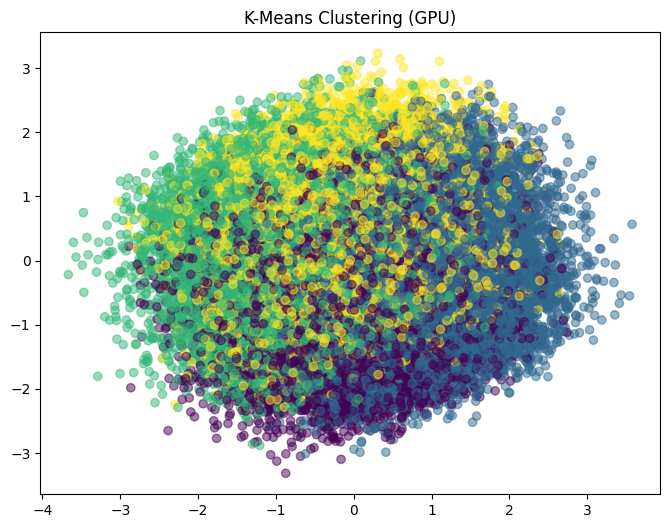

K-Means Silhouette Score: 0.044118512017992245


In [51]:
kmeans = cuKMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_gpu)
kmeans_silhouette = silhouette_score(X_processed, kmeans_labels.to_pandas())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels.to_pandas(), cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering (GPU)")
plt.show()
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

## Optimized Hierarchical Clustering (Using Sampled Data)

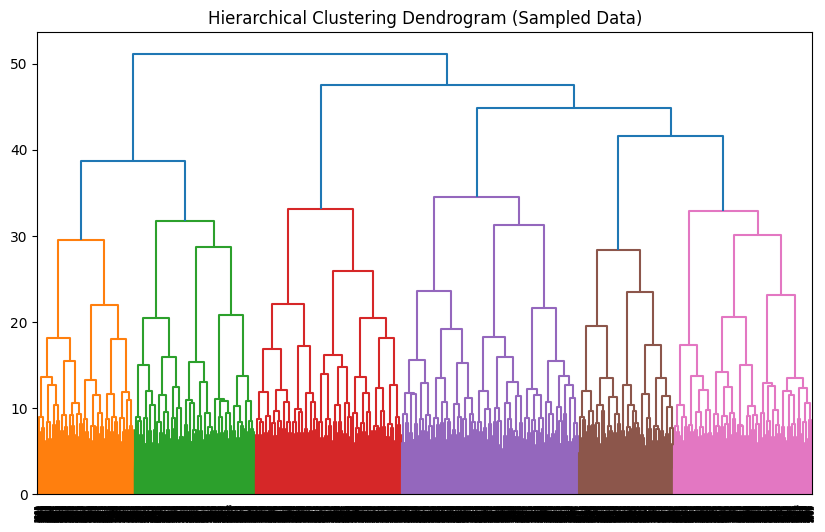

Agglomerative Clustering Silhouette Score: -0.019248385792242622


In [52]:
sample_size = min(4000, len(X_processed))  # Increased sample size within safe range
sample_indices = np.random.choice(len(X_processed), sample_size, replace=False)
X_sampled = X_processed[sample_indices]

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_sampled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.show()

agglo = cuAgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_gpu)
agglo_silhouette = silhouette_score(X_processed, agglo_labels.to_pandas())
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

## DBSCAN Clustering

[W] [17:55:24.361633] Batch size limited by the chosen integer type (4 bytes). 50000 -> 42949. Using the larger integer type might result in better performance


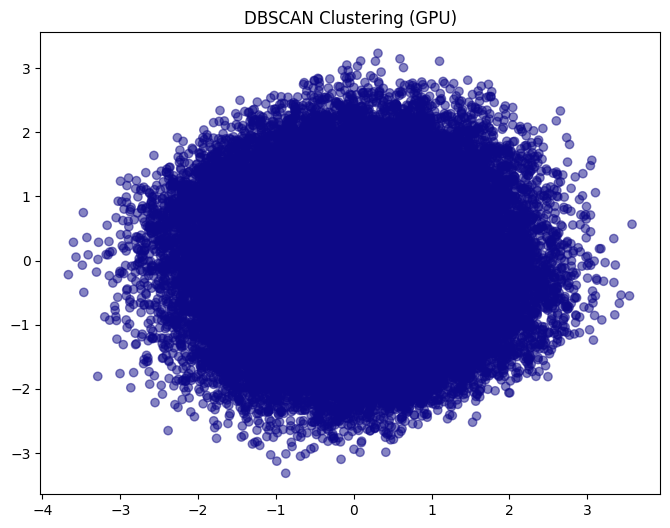

DBSCAN Silhouette Score: N/A (Too many noise points)


In [53]:
dbscan = cuDBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_gpu.astype("float64"))  # Upcast to 64-bit to avoid integer limitations

if len(set(dbscan_labels.to_pandas())) > 1:
    dbscan_silhouette = silhouette_score(X_processed, dbscan_labels.to_pandas())
else:
    dbscan_silhouette = 'N/A (Too many noise points)'

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels.to_pandas(), cmap='plasma', alpha=0.5)
plt.title("DBSCAN Clustering (GPU)")
plt.show()
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

## Gaussian Clustering

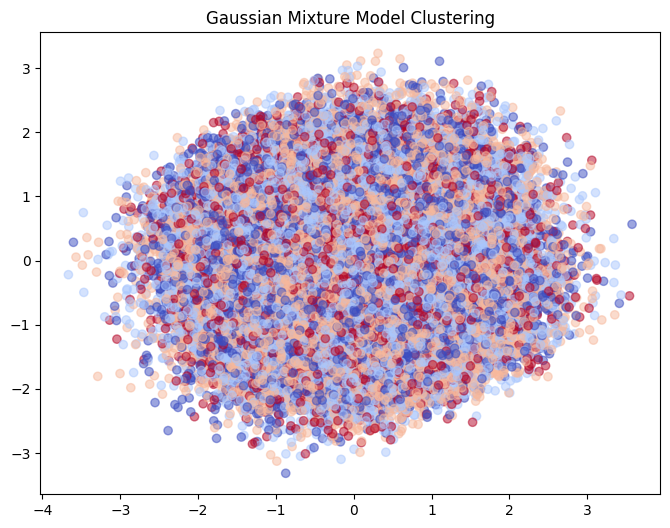

GMM Silhouette Score: 0.010766941756237713


In [54]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_processed)
gmm_silhouette = silhouette_score(X_processed, gmm_labels)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='coolwarm', alpha=0.5)
plt.title("Gaussian Mixture Model Clustering")
plt.show()
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Results

## Demographic & Regional Influence Analysis

In [55]:
clustered_data = pd.DataFrame(X_processed)
clustered_data['Cluster'] = kmeans_labels.to_pandas()

## Ensure 'df' has the necessary columns before merging

In [56]:
if 'Year' in df.columns:
  df['Cluster'] = kmeans_labels.to_pandas()

## Calculate mean values per cluster

In [57]:
demographic_trends = clustered_data.groupby('Cluster').mean()
print("Demographic Trends per Cluster:")
print(demographic_trends)

Demographic Trends per Cluster:
               0         1         2         3         4         5         6   \
Cluster                                                                         
0        0.810877 -0.068949 -0.009230  0.004762 -0.005681  0.949543  0.024165   
1       -0.821710  0.954259 -0.029023  0.011014  0.001645  0.060089  0.001920   
2        0.811187  0.073174  0.030751 -0.034834 -0.016707 -0.952797 -0.012611   
3       -0.811724 -0.949934  0.007354  0.019080  0.020776 -0.063697 -0.013632   

               7         8         9   ...        36        37        38  \
Cluster                                ...                                 
0        0.499841  0.500159  0.498173  ...  0.331004  0.167408  0.169393   
1        0.505240  0.494760  0.502741  ...  0.326749  0.169058  0.160593   
2        0.506202  0.493798  0.498760  ...  0.337095  0.167267  0.162945   
3        0.498921  0.501079  0.499480  ...  0.329603  0.168519  0.163642   

               39       

## Temporal Analysis (Sales Trends Over Time)

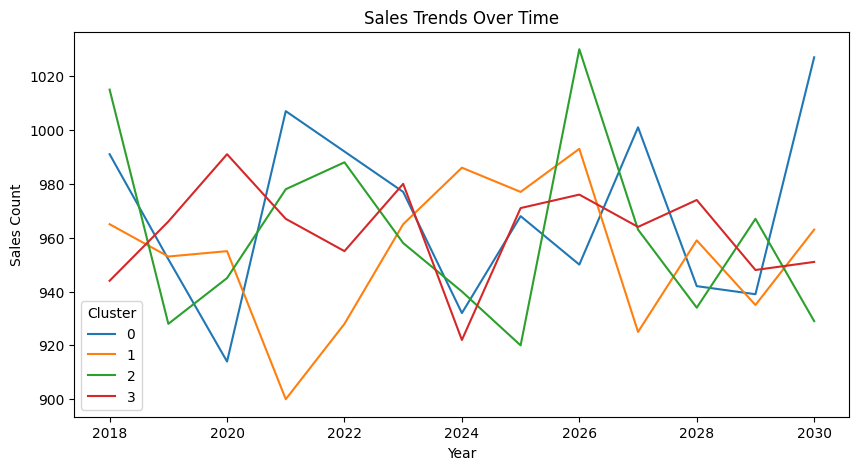

In [60]:
if 'Year' in df.columns and 'Cluster' in df.columns:  # Ensure both columns exist
  sales_trend = df.groupby(['Year', 'Cluster']).size().unstack()
  sales_trend.plot(kind='line', figsize=(10, 5), title="Sales Trends Over Time")
  plt.xlabel("Year")
  plt.ylabel("Sales Count")
  plt.legend(title="Cluster")
  plt.show()

## Chi-Square Test for Numerical Features

In [63]:
# Statistical Analysis of Cluster Differences
anova_results = {col: f_oneway(*[df[df['Cluster'] == c][col] for c in sorted(df['Cluster'].unique())]) for col in sorted(df.select_dtypes(include=['number']).columns) if col != 'Cluster'}

# Format ANOVA results for better readability
anova_results_formatted = {col: {'F-Statistic': res.statistic, 'p-Value': res.pvalue} for col, res in anova_results.items()}
print("ANOVA Results for Numerical Features:\n")
for i, (feature, stats) in enumerate(anova_results_formatted.items(), start=1):
  print(f"{i}. {feature}: F-Statistic = {stats['F-Statistic']:.4f}, p-Value = {stats['p-Value']:.4e}")

ANOVA Results for Numerical Features:

1. Awareness Campaign Impact: F-Statistic = 3.9041, p-Value = 8.4420e-03
2. CAGR (%): F-Statistic = 13868.1930, p-Value = 0.0000e+00
3. Day: F-Statistic = 1.5944, p-Value = 1.8840e-01
4. Growth Rate (%): F-Statistic = 8.0075, p-Value = 2.4779e-05
5. Innovation Index: F-Statistic = 13960.6030, p-Value = 0.0000e+00
6. Market Share (%): F-Statistic = 7.1710, p-Value = 8.2537e-05
7. Market Size (USD Million): F-Statistic = 32695.6557, p-Value = 0.0000e+00
8. Month: F-Statistic = 2.2708, p-Value = 7.8133e-02
9. Revenue Contribution (%): F-Statistic = 3.1093, p-Value = 2.5245e-02
10. Year: F-Statistic = 0.3309, p-Value = 8.0302e-01


## Chi-Square Test for Categorical Features

In [64]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns

chi_square_results = {}
for feature in categorical_features:
  if feature != 'Cluster':
    contingency_table = pd.crosstab(df['Cluster'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[feature] = {'Chi2-Statistic': chi2, 'p-Value': p}

print("\nChi-Square Test Results for Categorical Features:\n")
for i, (feature, stats) in enumerate(chi_square_results.items(), start=1):
  print(f"{i}. {feature}: Chi2-Statistic = {stats['Chi2-Statistic']:.4f}, p-Value = {stats['p-Value']:.4e}")

print("\nAnalysis Complete. Key demographic and temporal trends identified!")


Chi-Square Test Results for Categorical Features:

1. Material Type: Chi2-Statistic = 2.0545, p-Value = 5.6117e-01
2. Product Type: Chi2-Statistic = 0.6216, p-Value = 8.9148e-01
3. Distribution Channel: Chi2-Statistic = 5.8356, p-Value = 4.4186e-01
4. Event Name: Chi2-Statistic = 15.1231, p-Value = 1.9321e-02
5. Company Involved: Chi2-Statistic = 23.9464, p-Value = 4.6467e-01
6. Event Details: Chi2-Statistic = 11.6963, p-Value = 6.9097e-02
7. Region: Chi2-Statistic = 15.1205, p-Value = 2.3491e-01
8. Market Penetration: Chi2-Statistic = 5.9409, p-Value = 4.2984e-01
9. Brand Name: Chi2-Statistic = 26.1334, p-Value = 3.6644e-02
10. Regulatory Impact: Chi2-Statistic = 8.7076, p-Value = 1.9070e-01

Analysis Complete. Key demographic and temporal trends identified!
